# LSTM

- langfristige Abhängigkeiten erkennen und nutzen
- komplexe Muster in sequentiellen Daten zu erkennen, die über lange Zeiträume verteilt sind.
- Sprachmodellierung, der Textverarbeitung und anderen sequentiellen Datenverarbeitungsaufgaben

- Zeitliche Dynamik: Während traditionelle neuronale Netze in der Verarbeitung statischer Daten gut funktionieren, sind LSTMs darauf spezialisiert, zeitlich dynamische Sequenzen zu verarbeiten.
- Speicherfähigkeit: LSTMs können relevante Informationen über längere Zeiträume hinweg speichern und darauf zugreifen, wodurch die Problematik des verschwindenden Gradienten effektiv umgangen wird.

- Recursive neuronal network (RNN)
- durch spezielle Einheiten - die LSTM-Zellen - die es ermöglichen, Informationen über längere Zeitabschnitte zu speichern und zu übertragen, , langfristige Abhängigkeiten in Daten zu erkennen und zu lernen


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

df = pd.read_csv("../data/processed_combined_data.csv")
target = df['close_NVDA'].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(target.reshape(-1, 1))

In [ ]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
# train_size = int(len(X) * 0.8)
# X_train, y_train = X[:train_size], y[:train_size]
# X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
# model.add(LSTM(units=50))
# model.add(Dense(units=1))

# model.compile(optimizer='adam', loss='mean_squared_error')
# model.summary()

/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 2337, 50)       │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# predicted = model.predict(X_test)
# predicted_prices = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))
# actual_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))


Epoch 1/20


74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 4.8964e-04 - val_loss: 0.0070
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 3.7370e-05 - val_loss: 0.0028
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 2.9566e-05 - val_loss: 0.0039
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 2.8955e-05 - val_loss: 0.0015
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 2.0153e-05 - val_loss: 0.0032
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 1.8675e-05 - val_loss: 0.0048
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 2.2093e-05 - val_loss: 0.0022
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 1.6000e-05 - val_loss: 0.0034
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 2.9015e-05 - val_loss: 0.0015
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 2.3383e-05 - val_loss: 0.0016
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 1.9947e-05 - val_loss: 0.0022
Epoch 12/20
74/74 ━━━━━━

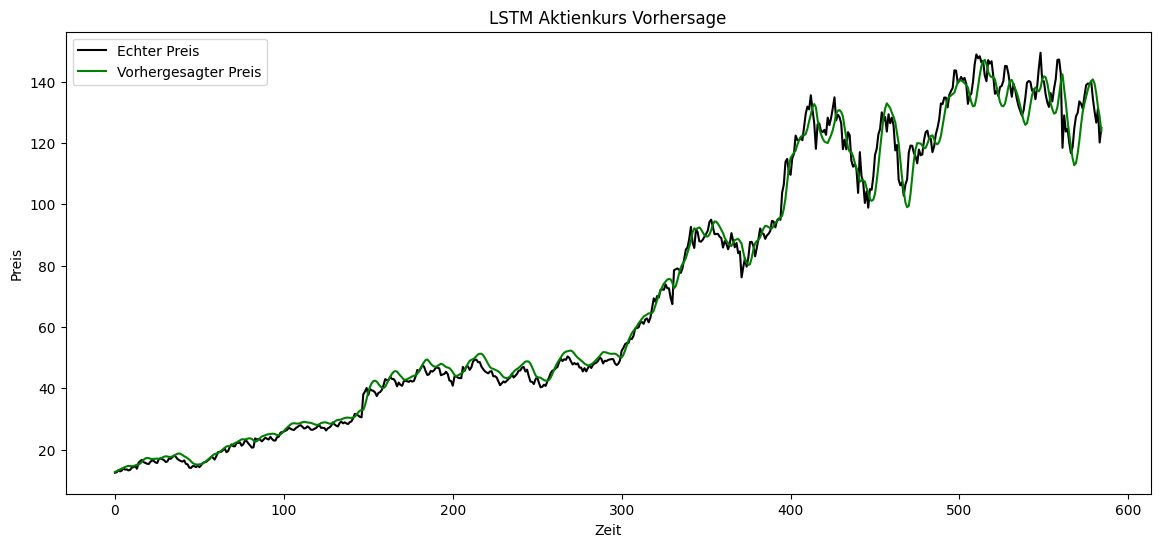

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 6))
# plt.plot(actual_prices, color="black", label="Echter Preis")
# plt.plot(predicted_prices, color="green", label="Vorhergesagter Preis")
# plt.title("LSTM Aktienkurs Vorhersage (X_test)")
# plt.xlabel("Zeit")
# plt.ylabel("Preis")
# plt.legend()
# plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


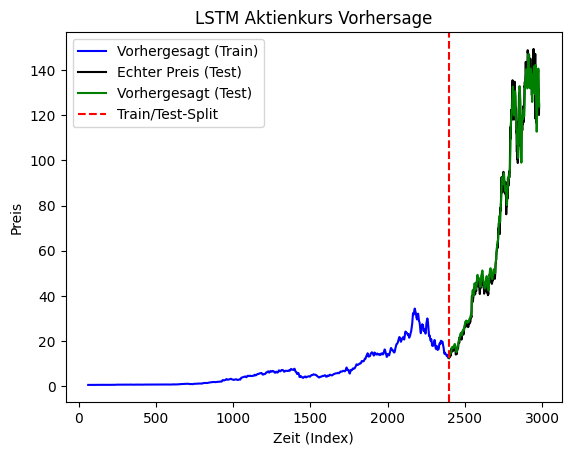

In [ ]:
# train_predicted = model.predict(X_train)
# train_predicted_prices = scaler.inverse_transform(train_predicted)

# plt.plot(range(seq_length, seq_length + len(train_predicted_prices)),
#          train_predicted_prices, label="Vorhergesagt (Train)", color="blue")

# # Plot für echte Testpreise
# plt.plot(range(seq_length + len(train_predicted_prices),
#                seq_length + len(train_predicted_prices) + len(actual_prices)),
#          actual_prices, label="Echter Preis (Test)", color="black")

# # Plot für vorhergesagte Testpreise
# plt.plot(range(seq_length + len(train_predicted_prices),
#                seq_length + len(train_predicted_prices) + len(predicted_prices)),
#          predicted_prices, label="Vorhergesagt (Test)", color="green")

# # Trennlinie
# plt.axvline(x=seq_length + len(train_predicted_prices), color='red', linestyle='--', label='Train/Test-Split')

# plt.title("LSTM Aktienkurs Vorhersage")
# plt.xlabel("Zeit (Index)")
# plt.ylabel("Preis")
# plt.legend()

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mse = mean_squared_error(actual_prices, predicted_prices)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(actual_prices, predicted_prices)
# r2 = r2_score(actual_prices, predicted_prices)

# print(f"📊 MSE  = {mse:.4f}")
# print(f"📊 RMSE = {rmse:.4f}")
# print(f"📊 MAE  = {mae:.4f}")
# print(f"📈 R²   = {r2:.4f}")

📊 MSE  = 17.4911
📊 RMSE = 4.1822
📊 MAE  = 2.8355
📈 R²   = 0.9910


# mit Timeseries cross validation

In [57]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


tscv = TimeSeriesSplit(n_splits=5)

def create_model(input_shape=(60, 1)):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1))  # Eine Ausgabe für Regressionsziel (z. B. Aktienkurs)
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

cv_mae_scores = []
for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold+1}:")
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Modell trainieren und bewerten
    model = create_model()  # eigene Funktion, die ein neues LSTM-Modell erstellt
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    print(f"  MAE: {mae:.4f}")
    cv_mae_scores.append(mae)
    

Fold 1:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
  MAE: 0.0054
Fold 2:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
  MAE: 0.0016
Fold 3:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
  MAE: 0.0026
Fold 4:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
  MAE: 0.0083
Fold 5:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
  MAE: 0.0554


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 2.0513e-05 - val_loss: 0.0078
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 2.4796e-05 - val_loss: 0.0052
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 2.0830e-05 - val_loss: 0.0051
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 1.4681e-05 - val_loss: 0.0064
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 1.4319e-05 - val_loss: 0.0045
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 1.8795e-05 - val_loss: 0.0043
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 1.5468e-05 - val_loss: 0.0028
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 1.9935e-05 - val_loss: 0.0067
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 2.3478e-05 - val_loss: 0.0035
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 1.2939e-05 - val_loss: 0.0042
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 1.3111e-05 - val_loss: 0.0034
Epoch 12/50
77/77

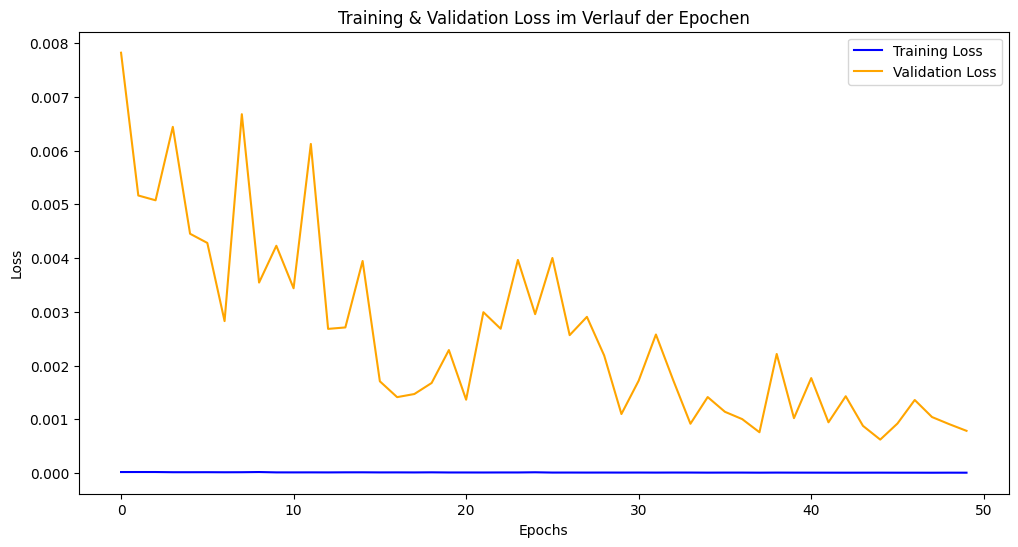

In [55]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Fehler (Loss) für Training und Validierung plotten
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training & Validation Loss im Verlauf der Epochen')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


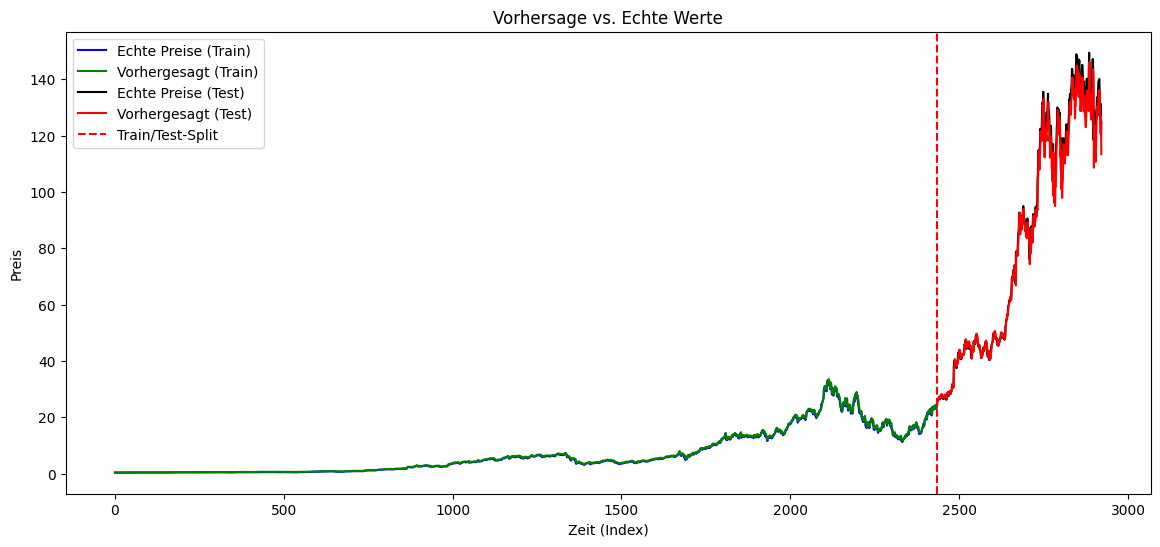

In [56]:
# Vorhersage für Trainings- und Testdaten
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Vorhersage zurückskalieren (um echte Preiswerte zu erhalten)
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(y_train_actual, label='Echte Preise (Train)', color='blue')
plt.plot(train_pred, label='Vorhergesagt (Train)', color='green')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label='Echte Preise (Test)', color='black')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(test_pred)), test_pred, label='Vorhergesagt (Test)', color='red')

plt.axvline(x=len(y_train_actual), color='red', linestyle='--', label='Train/Test-Split')

plt.title('Vorhersage vs. Echte Werte')
plt.xlabel('Zeit (Index)')
plt.ylabel('Preis')
plt.legend()
plt.show()

In [ ]:
# mae_cv = np.mean(cv_mae_scores)

# print("🔍 Vergleich der MAE:")
# print(f"Ohne CV: {mae:.4f}")
# print(f"Mit CV : {mae_cv:.4f}")

🔍 Vergleich der MAE:
Ohne CV: 0.0554
Mit CV : 0.0147


# -> Use  TimeSeriesSplit for cross validation!

🔍 **Vergleich der MAE:**

- **Ohne CV:** `0.0554`  
- **Mit CV:** `0.0147`